# Lab: Pokémon Data Classification

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [2]:
# Your import
import pandas as pd
import numpy as np

# Load the Pokémon dataset
pokemon_data = pd.read_csv('pokemon.csv')

# Display the first few rows
pokemon_data.head(5)

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

### <span style="color:red">Please create a derived feature: sp_attack_to_sp_defense_ratio, Target is Legendary</span>.

In [54]:
# Create a derived feature: sp_attack_to_sp_defense_ratio
sp_attack_to_sp_defense_ratio = pokemon_data['sp_attack'] / pokemon_data['sp_defense']
pokemon_data['sp_attack_to_sp_defense_ratio'] = sp_attack_to_sp_defense_ratio

# Fill any missing values
pokemon_data.fillna(0, inplace=True)

# Select all features + derived
# target: Legendary
features = ['sp_attack_to_sp_defense_ratio', 'deck_no', 'attack', 'defense',
            'sp_attack', 'sp_defense', 'speed', 'capture_rt','total_bs','type','gen']
target = 'legendary'
X = pokemon_data[features] # Your code
y = pokemon_data[target] # Your code

### 2.2 Data Transformation Using ColumnTransformer

In [59]:
# Your import
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Categorical and numerical columns
categorical_cols = ['type', 'gen']
numerical_cols = ['sp_attack_to_sp_defense_ratio','deck_no', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'capture_rt','total_bs']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

### Prepare the training data

In [61]:
from sklearn.model_selection import train_test_split

# Transform the data


# Train-test split
# Step 1: First train-test split to create training and temporary sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# X_transformed: Preprocessed feature data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# y: Target labels
y = pokemon_data[target]

In [64]:
# Your import
import pandas as pd
from sklearn.model_selection import train_test_split

# Please use train_test_split to prepare your data
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42, stratify=y_train_temp)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

#Print your X_train and X_test
X_train[:2], X_test[:2]

(array([[-0.63126784, -1.40307424,  0.66086487, -0.14654956, -0.71948024,
         -0.36149807, -0.71864542, -0.10513695, -0.23246377,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 2.06087038,  1.44541189, -0.29010128,  0.50900914,  2.27788458,
          0.16798472, -0.78938103, -0.70169222,  0.5694863 ,  1.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  1.        ]]),
 array([[ 1.

## Step 3: Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Please build your Logistic Regression model
model=LogisticRegression()
model.fit(X_train,y_train)


# Train Logistic Regression
train_pred_logistic = model.predict(X_train)
val_pred_logistic = model.predict(X_val)




# Please use AUC and accuracy score to evaluate your model
AUC_train_logistic = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
accuracy_train_logistic = accuracy_score(y_train, train_pred_logistic)

AUC_val_logistic = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
accuracy_val_logistic = accuracy_score(y_val, val_pred_logistic)

# By trying different methods, your accuracy can reach over 90%.






# Print results
print("Israel + Logistic Regression - Validation Performance:")
print(classification_report(y_val, val_pred_logistic))
print(f"Validation AUC: {AUC_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_val_logistic:.4f}")

Israel + Logistic Regression - Validation Performance:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       102
           1       0.89      0.80      0.84        10

    accuracy                           0.97       112
   macro avg       0.93      0.90      0.91       112
weighted avg       0.97      0.97      0.97       112

Validation AUC: 0.8912
Validation accuracy: 0.9732


## Step 4: Multi-Layer Perceptron (MLP)

In [66]:
from sklearn.neural_network import MLPClassifier

# Please build your Multi-Layer Perceptron model
preceptron = MLPClassifier(hidden_layer_sizes=(8, 4), activation='relu', max_iter=500, random_state=42)
preceptron.fit(X_train, y_train)

# Please use AUC and accuracy score to evalue your model
AUC_train_mlp = roc_auc_score(y_train, preceptron.predict_proba(X_train)[:, 1])
accuracy_train_mlp = accuracy_score(y_train, preceptron.predict(X_train))

# By trying different methods, your accuracy can reach over 90%.

# Train MLP Classifier
MLP = MLPClassifier(hidden_layer_sizes=(8, 4), activation='relu', max_iter=500, random_state=42)
MLP.fit(X_train, y_train)
# Evaluate MLP Classifier
y_val_pred_mlp = MLP.predict(X_val)
auc_val_mlp = roc_auc_score(y_val, MLP.predict_proba(X_val)[:, 1])


# Calculate accuracy for the validation set
accuracy_val_mlp = accuracy_score(y_val, y_val_pred_mlp)

print("Israel + MLP Classifier - Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_val_mlp:.4f}")

Israel + MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       102
           1       0.88      0.70      0.78        10

    accuracy                           0.96       112
   macro avg       0.92      0.85      0.88       112
weighted avg       0.96      0.96      0.96       112

Validation AUC: 0.8500
Validation accuracy: 0.9643


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
# Please record your loss of logistic regression with 500 iterations
# Initialize the model with warm_start to fit incrementally
model = LogisticRegression(warm_start=True, random_state=42, max_iter=1)


# To store the loss values
loss_curve = []
for i in range(500):
    model.fit(X_train, y_train)
    y_prob= model.predict_proba(X_train)
    loss = log_loss(y_train, y_prob)
    loss_curve.append(loss)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

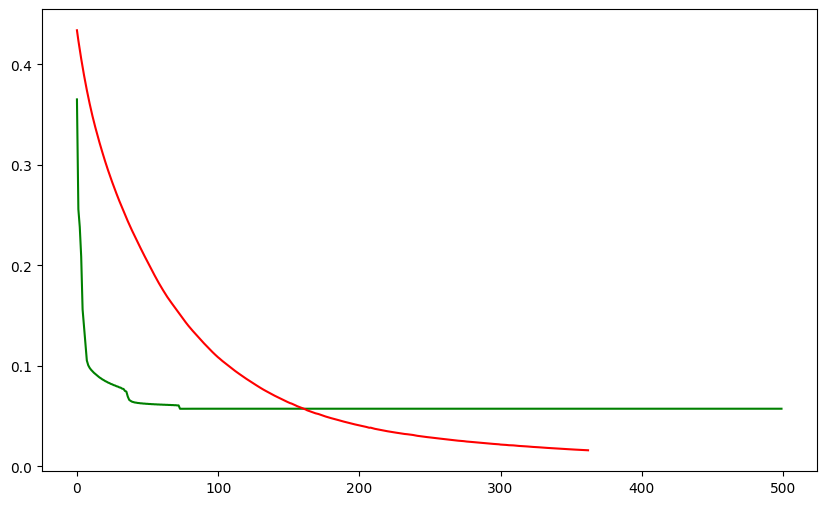

In [68]:
# Extract loss during MLP training
MLP = MLPClassifier(hidden_layer_sizes=(8, 4), activation='relu', max_iter=500, random_state=42)
MLP.fit(X_train, y_train)

# Plot the loss difference during MLP training and Logistic
plt.figure(figsize=(10, 6))
# please set color of Logistic as green, set MLP as red.
plt.plot(range(500), loss_curve, label='Logistic', color='green')
plt.plot(range(len(MLP.loss_curve_)), MLP.loss_curve_, label='MLP', color='red')

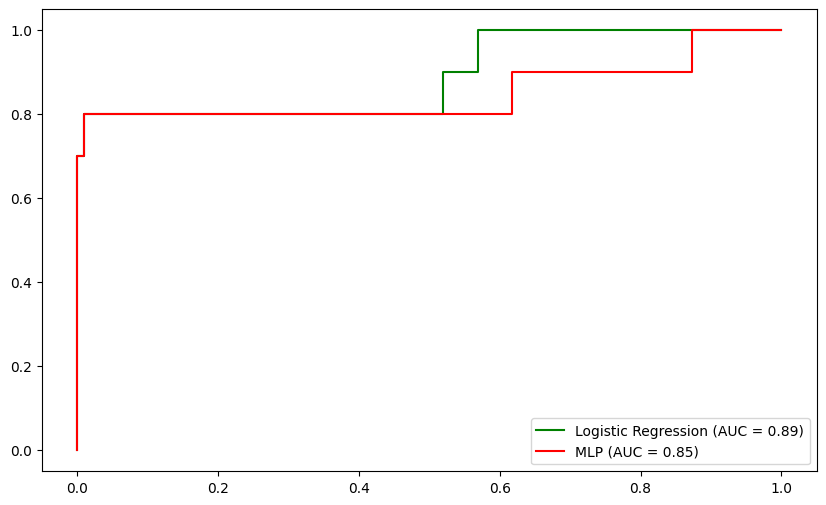

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for Logistic Regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Calculate ROC curve and AUC for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_val, MLP.predict_proba(X_val)[:, 1])
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic, color='green')
plt.plot(fpr_mlp, tpr_mlp, label='MLP (AUC = %0.2f)' % roc_auc_mlp, color='red')
plt.legend(loc='lower right')

In [79]:
# Your idea:The AUC values provide a measure of how well each model acts between classes, with Logistic Regression, AUC = 0.89 performing slightly better than MLP AUC = 0.85

## Step 6: Visualization of Predictions and Confusion Matrices

### 6.1 Actual vs Predicted Results

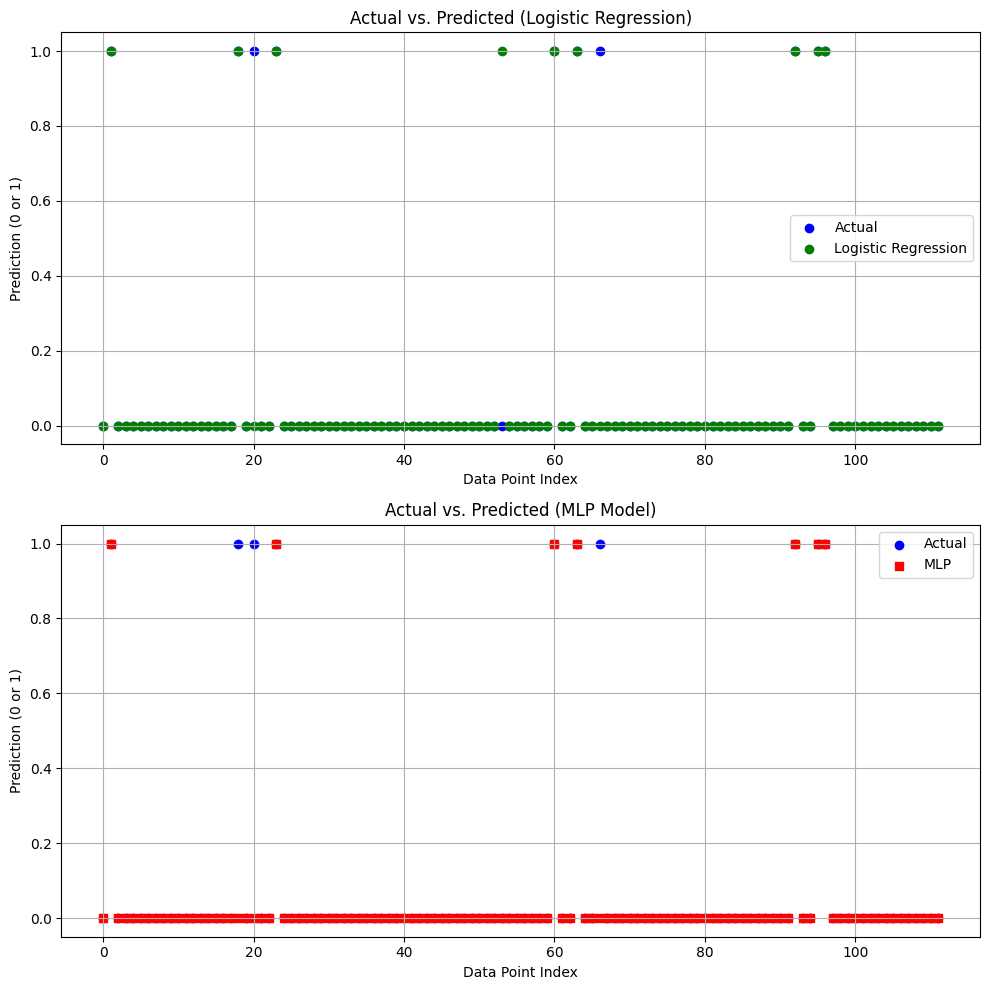

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Please plot the Actual data and Predicted for Logistic and MLP
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot Logistic Regression predictions
ax[0].scatter(np.arange(len(actual)), actual, label='Actual', color='blue')
ax[0].scatter(np.arange(len(actual)), predicted_logistic, label='Logistic Regression', color='green')
ax[0].set_xlabel('Data Point Index')
ax[0].set_ylabel('Prediction (0 or 1)')
ax[0].set_title('Actual vs. Predicted (Logistic Regression)')
ax[0].legend(loc='best')
ax[0].grid(True)

# Plot MLP predictions
ax[1].scatter(np.arange(len(actual)), actual, label='Actual', color='blue')
ax[1].scatter(np.arange(len(actual)), predicted_mlp, label='MLP', marker='s', color='red')
ax[1].set_xlabel('Data Point Index')
ax[1].set_ylabel('Prediction (0 or 1)')
ax[1].set_title('Actual vs. Predicted (MLP Model)')
ax[1].legend(loc='best')
ax[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


### Confusion Matrices

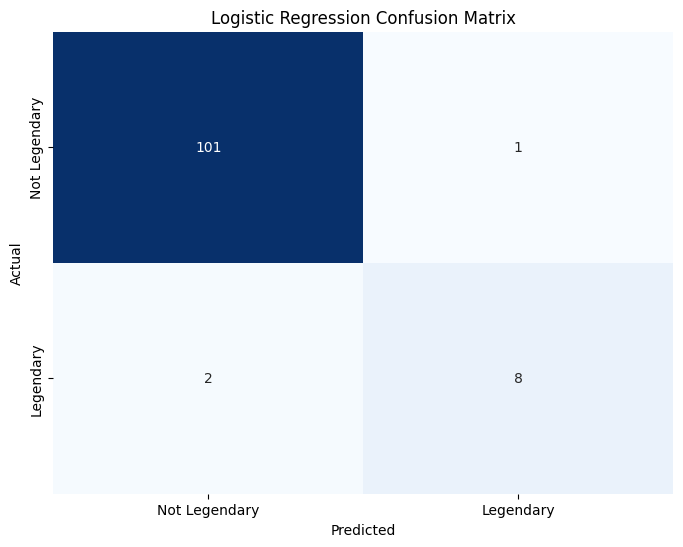

In [71]:
# plot Logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Logistic Regression
plt.figure(figsize=(8, 6))
cm_logistic = confusion_matrix(y_val, val_pred_logistic)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Legendary', 'Legendary'],
            yticklabels=['Not Legendary', 'Legendary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
# your code

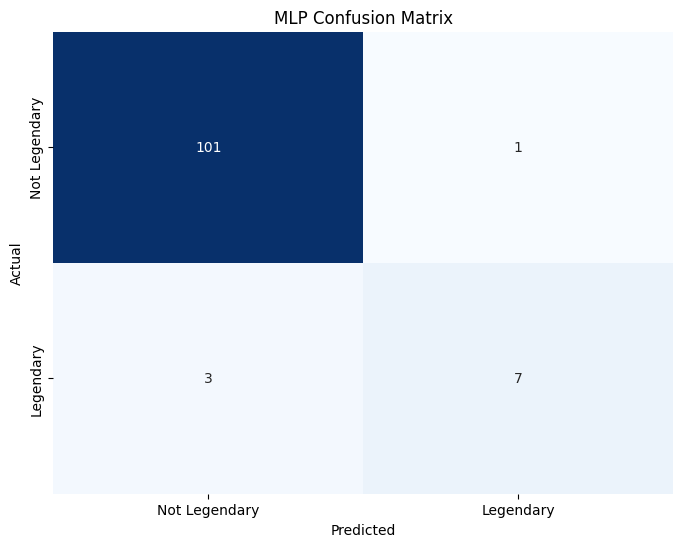

In [72]:
# plot MLP
plt.figure(figsize=(8, 6))
cm_mlp = confusion_matrix(y_val, y_val_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Legendary', 'Legendary'],
            yticklabels=['Not Legendary', 'Legendary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Confusion Matrix')
plt.show()

## Conclusion

In [80]:
# Please compare the difference and common between Logistic results and MLP results
# Your idea :
# Diffrence: Logistic Regression slightly outperforms MLP in terms of AUC. Indicating the effectiveness for this given dataset
# Common: Both predict class probabilities, allowing the use of ROC curves and AUC scores for evaluation.
